<a href="https://colab.research.google.com/github/teaajo/Leaf_Classification/blob/main/Teodora_JovanovicIT70_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KLASIFIKACIJA


Klasifikacija je tehnika nadgledanog ucenja koja se koristi za identifikaciju kategorije na osnovu trening podataka. U klasifikaciji, program uci iz datog skupa podataka, a zatim klasifikuje novo posmatranje u više klasa ili grupa. Kao na primer, Da ili Ne, 0 ili 1, Spam ili Ne Spam, macka ili pas, itd. 

Za razliku od regresije, izlazna varijabla klasifikacije je kategorija, a ne vrednost, kao sto je „zeleno ili plavo“, „vocce ili zivotinja“ itd

Postoje dve vrste klasifikacija:

**Binarna klasifikacija**: Ako problem klasifikacije ima samo dva mogucca ishoda.
Primer: DA ili NE, MUSKO ili ZENSKO, SPAM ili NE SPAM, MACKA ili PAS, itd.

**Klasifikator vise klasa**: Ako problem klasifikacije ima vise od dva ishoda, onda se naziva viseklasni klasifikator.

Primer: Klasifikacija odredjene vrste.

Tema ovog zadatka jeste identifikovati 99 vrsta biljaka na osnovu odredjenih karakteristika kao sto su margine, oblik i tekstura listova. Sam zadatak je zamisljen na taj nacin da je neophodno istraziti koji su algoritmi optimalni za ovakvu vrstu klasifikacije

Iako je za potrebe projekta, u slucajevima klasifikacije do sada koriscen algoritam ***Random forest*** ovog puta ce biti koriscen ***XGBoost*** algoritam.

**XGBoost** algoritam

Ovaj algoritam je zasnovan na stablu odlučivanja koji koristi okvir za povećanje gradijenta.

Stabla odlučivanja stvaraju model koji vrši predviđanje tako što procenjuje niz, odnosno stablo, pitanja „ako-onda-drugo“ tačno/netačno i procenjuje minimalni broj pitanja potrebnih za procenu verovatnoće donošenja ispravne odluke. 

Stabla odlučivanja sa povećanjem gradijenta (GBDT) je algoritam učenja ansambla stabla odluka sličan slučajnoj šumi, za klasifikaciju i regresiju. Algoritmi za učenje ansambla kombinuju više algoritama mašinskog učenja da bi dobili bolji model.

Kada govorimo o razlikama izmedju **XGBoost** algoritma i **Random Forest** moramo uzeti u obzir da se podaci o obuci uzimaju na drugačiji način. XGBoost posebno obučava podatke o povećanju gradijenta i stabla odlučivanja o povećanju gradijenta. Metode obuke koje koriste oba algoritma su različite. Možemo da koristimo XGBoost da obučimo algoritam Random Forest ako ima podatke visokog gradijenta ili možemo da koristimo algoritam Random Forest da obučimo XGBoost za njegova specifična stabla odlučivanja. Takođe, možemo uzeti uzorke podataka ako su trening podaci ogromni i ako su podaci veoma mali, možemo koristiti čitave trening podatke da bismo znali gradijent istih.

XGBoost pomaže u numeričkoj optimizaciji gde je funkcija gubitka podataka minimizirana uz pomoć slabih učenika, tako da se iteracija dešava u lokalnoj funkciji na diferenciran način. Uzorak ovde nije modifikovan, ali se svakoj osobini u podacima daju različiti nivoi važnosti. Slučajna šuma je uglavnom tehnika u kojoj se razmatraju različiti podskupovi i racuna se prosek svakog podskupa uzimajuci slucajan podskup.


**Implementacija**

Set podataka sadrzi 4 fajla:

*   test.csv - podaci za testiranje
*   train.csv - podaci za trening
*   images.csv - skup fotografija listova
*   sample_submission - predstavlja resenje zadatka







In [ ]:
import numpy as np 
import pandas as pd

# Importovanje odgovarajucih biblioteka
# numpu -> neophodna za rad sa numerickim podacima
# pandas -> neophodna za importovanje podataka u razlicitim formatima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Povezivanje sa Google Drive-om kako bi pristupili podacima

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/#4.zip

# Neophodno je unzipovati fajlove 

Archive:  /content/drive/MyDrive/#4.zip
  inflating: images.zip              
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [ ]:
import_train = '/content/train.csv.zip'
train_data = pd.read_csv(import_train,index_col='id') 

# Pomocu biblioteke Pandas vrsi se importovanje podataka iz train.csv fajla
# Oznacena je kolona id kao indeksna

Prilikom pregleda podataka mozemo uociti da kolona 'species' oznacava vrstu biljke, dok kolone margin, shape i texture oznacavaju karakteristike ivica, oblika i teksture

In [ ]:
train_data

# Pregled podataka 

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Da bi postigli sto bolje rezultate pozeljno je da kategorije iz kolone 'species' prevedemo u numericku vrednost. 
# Za tu namenu koristimo LabelEncoder biblioteku

In [ ]:
y = train_data['species']
label_encoder = LabelEncoder().fit(y)
labels = label_encoder.transform(y) 
classes = list(label_encoder.classes_) 

In [ ]:
classes

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [ ]:
train_data.drop(columns='species',axis=1,inplace=True)
X = train_data

# Neophodno je obrisati kolonu 'species'
# axis oznacava da zelimo da obrisemo kolonu, inplace = true da nema povratnu vrednost

In [ ]:
X

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
2,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
3,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
5,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
6,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,0.042969,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
1578,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,0.003906,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
1581,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,0.000000,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953


Kod XGBoost algoritma nephodno je definisati odgovarajuce parametre:

**n_estimators** - definise broj stabala za klasu (u ovom slucaju se uzima opseg od 50 do 150, sa korakom od 50 - moguca 50, 100 ili 150 stabala

**learning_rate** - koliko model brzo uci

**max_debt** - dubina stabla


In [ ]:
parameters = {
    'n_estimators': list(range(50,101,50)),
    'learning_rate':[l/500 for l in range (5,15,10)],
    'max_depth': list(range(3,15,5)) 
}           

In [ ]:
parameters

{'n_estimators': [50, 100], 'learning_rate': [0.01], 'max_depth': [3, 8, 13]}

In [ ]:
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import log_loss ,accuracy_score

#sklearn.metrics - sadrzi funkcije koje služe za merenje greske predvidjanja.
#XGBClassifier- implementacija scikit-learn API za XGBoost klasifikaciju.

In [ ]:
gscv = GridSearchCV(estimator=XGBClassifier(),
                       param_grid = parameters, 
                       scoring= 'neg_log_loss',
                       n_jobs=15,cv=5, verbose=7)

# GridSearchCV(GridSearch with Cross-Validation)- predstavlja pretragu najboljih parametara za određeni skup podataka ili za model.
# estimator - instanca modela za koju želimo da proverimo parametre 
# param_grid - parametri koje želimo da testiramo 
# n_jobs - broj procesa koji želimo paralelno pokretati
# verbose - određuje detaljnost prikazivanja poruke kao rezultata izvršavanja 
# scoring - 'neg_log_loss'-je funkcija iz modula sklearn metrics koja služi za merenje greške predviđanja
# manja povratna vrednost -> manja greska predvidjanja

In [ ]:
gscv

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=15,
             param_grid={'learning_rate': [0.01], 'max_depth': [3, 8, 13],
                         'n_estimators': [50, 100]},
             scoring='neg_log_loss', verbose=7)

In [ ]:
gscv.fit(X,y)

# Trening modela

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=15,
             param_grid={'learning_rate': [0.01], 'max_depth': [3, 8, 13],
                         'n_estimators': [50, 100]},
             scoring='neg_log_loss', verbose=7)

In [ ]:
best_n_estimators = gscv.best_params_.get('n_estimators')
best_n_estimators
# Izdvajanje najboljih parametara

100

In [ ]:
best_learning_rate = gscv.best_params_.get('learning_rate')
best_learning_rate

0.01

In [ ]:
best_max_depth = gscv.best_params_.get('max_depth')
best_max_depth

3

In [ ]:
eval_set = [(X, y)] 
# X predstavlja numericke podatke na osnovu kojih se vrsi klasifikacija
# Y predstavlja klase koje se klasifikuju

final_model = XGBClassifier(n_estimators=best_n_estimators,
                            learning_rate=best_learning_rate,
                            max_depth=best_max_depth)

train=final_model.fit(X,y, eval_metric=["merror", "mlogloss"],eval_set=eval_set,verbose=True)
# eval-metric predstavlja metrike za evaluaciju trening modela 
# eval-set predstavlja set nad kojim se vrši evaluacija

# Kao rezultat nakon što se doda novo stablo (epoha) prikazuje se greška klasifikacije i vrednost 'log loss'
# Logg loss prikazuje posle koje epohe učenje modela kreće da opada, a greška klasifikacije ukazuje kolike su greške u klasifikaciji nakon svake epohe.


[0]	validation_0-merror:0.738384	validation_0-mlogloss:4.55203
[1]	validation_0-merror:0.640404	validation_0-mlogloss:4.50854
[2]	validation_0-merror:0.60101	validation_0-mlogloss:4.46541
[3]	validation_0-merror:0.584848	validation_0-mlogloss:4.42307
[4]	validation_0-merror:0.570707	validation_0-mlogloss:4.38047
[5]	validation_0-merror:0.539394	validation_0-mlogloss:4.33835
[6]	validation_0-merror:0.527273	validation_0-mlogloss:4.29595
[7]	validation_0-merror:0.536364	validation_0-mlogloss:4.25413
[8]	validation_0-merror:0.517172	validation_0-mlogloss:4.21244
[9]	validation_0-merror:0.491919	validation_0-mlogloss:4.17118
[10]	validation_0-merror:0.474747	validation_0-mlogloss:4.13034
[11]	validation_0-merror:0.446465	validation_0-mlogloss:4.08864
[12]	validation_0-merror:0.449495	validation_0-mlogloss:4.04791
[13]	validation_0-merror:0.414141	validation_0-mlogloss:4.00697
[14]	validation_0-merror:0.393939	validation_0-mlogloss:3.96613
[15]	validation_0-merror:0.381818	validation_0-mlog

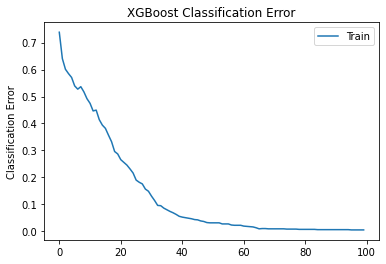

In [ ]:
results = final_model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

# Vizualizacija dobijenih vrednosti

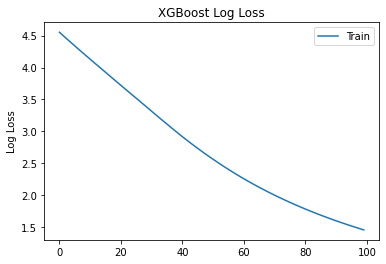

In [ ]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

In [ ]:
test_data = pd.read_csv('/content/test.csv.zip')
test_index = test_data.id 
test_data.drop('id',axis=1,inplace=True)
pred_test = final_model.predict_proba(test_data) # koristi naucene parametre kako bi predvidela nove 
pred_test

# Model je istreniran, neophodno je izvrsiti predvidjanje

array([[0.00921788, 0.00920848, 0.00921649, ..., 0.00923097, 0.00920584,
        0.00928815],
       [0.0067778 , 0.00677089, 0.02605506, ..., 0.00678742, 0.00676895,
        0.00678024],
       [0.00804629, 0.10044695, 0.00804507, ..., 0.00805771, 0.00803578,
        0.01141656],
       ...,
       [0.00719311, 0.01160238, 0.00719203, ..., 0.00720333, 0.00718372,
        0.00719571],
       [0.00954675, 0.00976954, 0.01002838, ..., 0.00956031, 0.00953428,
        0.00955019],
       [0.00689125, 0.01346598, 0.00689022, ..., 0.00690104, 0.00688225,
        0.00689374]], dtype=float32)

In [ ]:
submission = pd.DataFrame(pred_test, columns=classes) # dobijeni podaci se smestaju u kolone
submission.insert(0, 'id', test_index)
submission.to_csv('submission.csv', index=False)